Import Library

In [177]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Membaca Dataset

In [178]:
data = pd.read_csv('income.csv')

Menampilkan Dataset

In [179]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,40,Private,130834,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
24996,31,Local-gov,33124,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K
24997,38,Federal-gov,190895,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,?,>50K
24998,23,Private,420973,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K


A. Supervised Learning

A1. Implementasi Metode SVC & Linear Regression

- Support Vector Classifier dari Support Vector Machine

Import Library untuk SVC

In [180]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

Tentukan Label X Sebagai Fitur dan y Sebagai Target Klasifikasi

In [181]:
X = data[['education.num', 'hours.per.week']]
y = data['income']

Split Data (Membagi Dataset Menjadi Data Training dan Data Testing)

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Membuat Objek Classifier Model svm

In [183]:
svm = SVC()

Melatih Model svm

In [184]:
svm.fit(X_train, y_train)

SVC()

Melakukan Prediksi Data dengan Model svm

In [185]:
y_pred_svm = svm.predict(X_test)

A2. Evaluasi Hasil Prediksi Klasifikasi dan Regresi

Evaluasi Klasifikasi

Import Library Confusion Matrix dan Classification Report untuk Evaluasi

In [186]:
from sklearn.metrics import confusion_matrix, classification_report

Evaluasi Confusion Matrix SVC

In [187]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

Visualisasi Evaluasi Confusiom Matrix SVC

Text(0.5, 1.0, 'Confusion Matrix SVC')

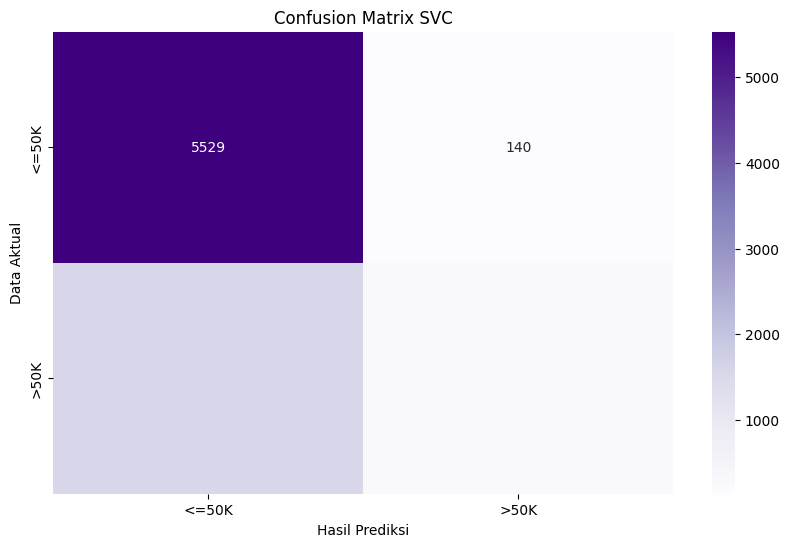

In [188]:
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Purples', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Hasil Prediksi')
plt.ylabel('Data Aktual')
plt.title('Confusion Matrix SVC')

Evaluasi Classification Report SVC

In [189]:
class_report_svm = classification_report(y_test, y_pred_svm)

Menampilkan Hasil Evaluasi Classification Report

In [190]:
report = classification_report(y_test, y_pred_svm)

print(report)

              precision    recall  f1-score   support

       <=50K       0.78      0.98      0.87      5669
        >50K       0.67      0.16      0.26      1831

    accuracy                           0.78      7500
   macro avg       0.73      0.57      0.56      7500
weighted avg       0.76      0.78      0.72      7500



Membuat Plot Titik-Titik Hasil Prediksi Nilai Pada Target

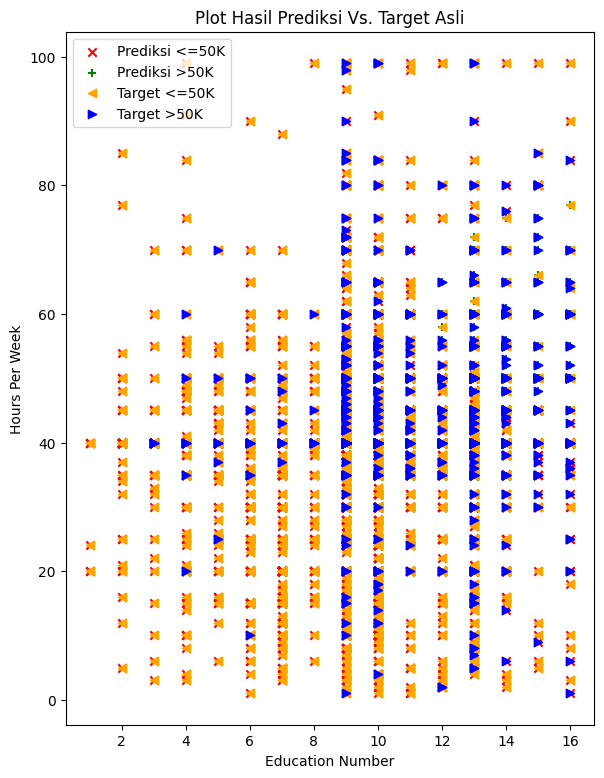

In [191]:
#Membuat ukuran display plot
plt.figure(figsize=(15, 9))
plt.subplot(1, 2, 1)

#Plot titik-titik untuk hasil prediksi dari target yaitu 'income'
#Hasil Prediksi income <=50K (warna merah) 
plt.scatter(X_test[y_pred_svm == '<=50K']['education.num'], X_test[y_pred_svm == '<=50K']['hours.per.week'], color ='red', marker='x', label='Prediksi <=50K')
#Hasil Prediksi income >50K (warna hijau) 
plt.scatter(X_test[y_pred_svm == '>50K']['education.num'], X_test[y_pred_svm == '>50K']['hours.per.week'], color ='green', marker='+', label='Prediksi >50K')

#Plot titik-titik untuk target asli yaitu 'income'
#Target income <=50K (warna oranye) 
plt.scatter(X_test[y_test == '<=50K']['education.num'], X_test[y_test == '<=50K']['hours.per.week'], color ='orange', marker='<', label='Target <=50K')
#Target income >50K (warna biru) 
plt.scatter(X_test[y_test == '>50K']['education.num'], X_test[y_test == '>50K']['hours.per.week'], color ='blue', marker='>', label='Target >50K')

plt.xlabel('Education Number')
plt.ylabel('Hours Per Week')
plt.title('Plot Hasil Prediksi Vs. Target Asli')
plt.legend()

plt.show()

- Naive Bayes

Import Library untuk Metode Naive Bayes

In [192]:
from sklearn.naive_bayes import GaussianNB

Membuat Objek Classifier NB

In [193]:
nb = GaussianNB()

Melatih Model NB

In [194]:
nb.fit(X_train, y_train)

GaussianNB()

Melakukan Prediksi Data Dengan NB

In [195]:
y_pred_nb = nb.predict(X_test)

Evaluasi Confusion Matrix NB

In [196]:
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

Visualisasi Evaluasi Confusiom Matrix NB

Text(0.5, 1.0, 'Confusion Matrix SVC')

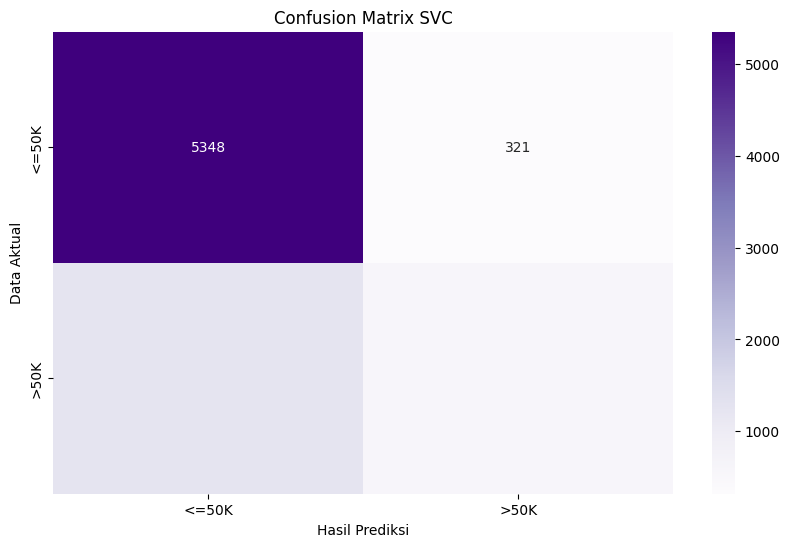

In [197]:
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Purples', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Hasil Prediksi')
plt.ylabel('Data Aktual')
plt.title('Confusion Matrix SVC')

Evaluasi Classification Report NB

In [198]:
report = classification_report(y_test, y_pred_nb)

print(report)

              precision    recall  f1-score   support

       <=50K       0.81      0.94      0.87      5669
        >50K       0.64      0.32      0.42      1831

    accuracy                           0.79      7500
   macro avg       0.73      0.63      0.65      7500
weighted avg       0.77      0.79      0.76      7500



Membuat Plot Titik-Titik Hasil Prediksi Nilai Pada Target

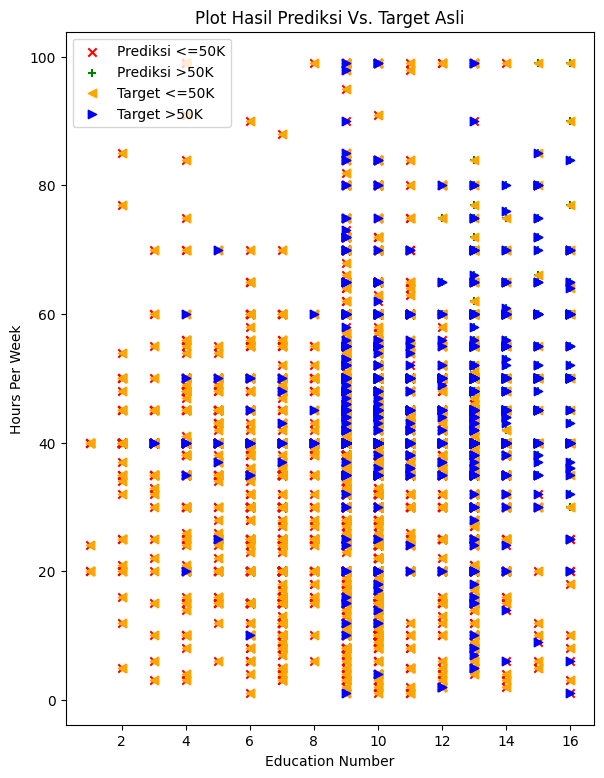

In [199]:
#Membuat ukuran display plot
plt.figure(figsize=(15, 9))
plt.subplot(1, 2, 1)

#Titik-titik untuk hasil prediksi dari target yaitu 'income'
#Hasil prediksi income <=50K (warna merah) 
plt.scatter(X_test[y_pred_nb == '<=50K']['education.num'], X_test[y_pred_nb == '<=50K']['hours.per.week'], color ='red', marker='x', label='Prediksi <=50K')
#Hasil Prediksi income >50K (warna hijau) 
plt.scatter(X_test[y_pred_nb == '>50K']['education.num'], X_test[y_pred_nb == '>50K']['hours.per.week'], color ='green', marker='+', label='Prediksi >50K')

#Plot titik-titik untuk target asli yaitu 'income'
#Target income <=50K (warna oranye) 
plt.scatter(X_test[y_test == '<=50K']['education.num'], X_test[y_test == '<=50K']['hours.per.week'], color ='orange', marker='<', label='Target <=50K')
#Target income >50K (warna biru) 
plt.scatter(X_test[y_test == '>50K']['education.num'], X_test[y_test == '>50K']['hours.per.week'], color ='blue', marker='>', label='Target >50K')

plt.xlabel('Education Number')
plt.ylabel('Hours Per Week')
plt.title('Plot Hasil Prediksi Vs. Target Asli')
plt.legend()

plt.show()

- Linear Regression

Import Library untuk Linear Regression

In [200]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Tentukan Label X Sebagai Fitur dan y Sebagai Target Klasifikasi

In [201]:
X = data[['age', 'education.num']]
y = data['hours.per.week']

Split Data (Membagi Dataset Menjadi Data Training dan Data Testing)

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Membuat objek Linear Regression

In [203]:
lr = LinearRegression()

Melatih Model lr

In [204]:
lr.fit(X_train, y_train)

LinearRegression()

Melakukan Prediksi Data dengan lr

In [205]:
y_pred_lr = lr.predict(X_test)

A2. Evaluasi Hasil Prediksi Klasifikasi dan Regresi

Evaluasi Regresi

Import Library untuk Evaluasi Regresi

In [206]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Evaluasi MAE, MSE, RMSE, dan R2-Score

In [207]:
print("MAE :", mean_absolute_error(y_test, y_pred_lr))
print("MSE :", mean_squared_error(y_test, y_pred_lr))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R-Squared :", r2_score(y_test, y_pred_lr))

MAE : 7.837928517113885
MSE : 151.33003512441124
RMSE : 12.301627336430382
R-Squared : 0.033171643044031196


Membuat Plot Titik-Titik Hasil Prediksi Nilai Pada Target

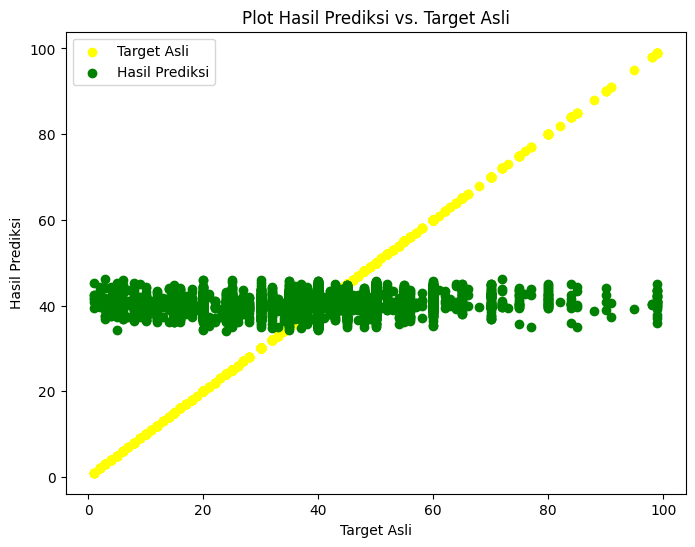

In [208]:
#Membuat ukuran display plot
plt.figure(figsize=(8, 6))

#Plot titik-titik target asli (warna kuning) untuk target hours per week
plt.scatter(y_test, y_test, color='yellow', label='Target Asli')

#Plot titik-titik hasil prediksi (warna hijau) untuk target hours per week
plt.scatter(y_test, y_pred_lr, color='green', label='Hasil Prediksi')

plt.xlabel('Target Asli')
plt.ylabel('Hasil Prediksi')
plt.legend()
plt.title('Plot Hasil Prediksi vs. Target Asli')

plt.show()

B. Unsupervised Learning

B1. Implementasikan metode K-Means

Import Library KMeans

In [209]:
from sklearn.cluster import KMeans

Mengambil Data Untuk Variabel X

In [210]:
X = data.iloc[:, [0, 4]].values 

Menginisialisasi List untuk Menyimpan Nilai WCSS

In [211]:
wcss = []

Membuat Loop untuk Melatih Algoritma K-Means

In [212]:
for k in range(1, 7):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

Membuat Grafik Elbow Method

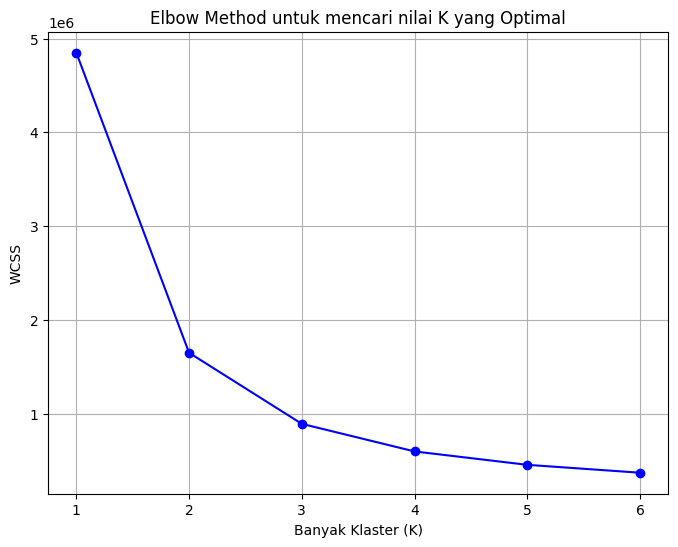

In [213]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 7), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)

plt.show()

Dari grafik elbow method diatas akan dipilih jumlah kelompok atau kluster yang paling optimal (jumlah terbaik) yaitu 3.

In [214]:
K = 3 
#Menginisialisasikan K-Means
kmeans = KMeans(n_clusters=K, n_init=10)

Menggunakan kolom attribute 'age' dan 'education.num' sebagai fitur variabel X

In [215]:
X = data[['age', 'education.num']]

Melatih Model K-Means

In [216]:
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10)

Memprediksi Cluster dalam Dataset

In [217]:
predicted_clusters = kmeans.predict(X)

Menambahkan Kolom Prediksi Bernama 'cluster' ke dalam Dataset

In [218]:
data["cluster"] = predicted_clusters

B2. Evaluasi Cluster

- Unlabeled Dataset

Import Library untuk Melakukan Evaluasi

In [219]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

Mengevaluasi hasil clustering yang telah diprediksi dengan metrik Silhoutte Score, Davies Bouldin Score dan Calinski Harabasz Score

In [220]:
ss_score = silhouette_score(X, predicted_clusters)
print(f"Silhouette Score: {ss_score:.2f}")
db_index = davies_bouldin_score(X, predicted_clusters)
print(f"Davies-Bouldin Index: {db_index:.2f}")
ch_index = calinski_harabasz_score(X, predicted_clusters)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.50
Davies-Bouldin Index: 0.63
Calinski-Harabasz Index: 55608.36


- Labeled Dataset

Import Library untuk Melakukan Evaluasi

In [221]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score 
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score 

Crosstab untuk Membandingkan predicted_clusters dan true_labels (Data Aktual)

In [222]:
cross_tab = pd.crosstab(data['cluster'], data['income'])
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
income   <=50K  >50K
cluster             
0         6419  3445
1         9180   974
2         3356  1626 



Adjusted Rand Index

In [223]:
ari = adjusted_rand_score(data['income'], predicted_clusters)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): 0.06


Normalized Mutual Information

In [224]:
nmi_income = normalized_mutual_info_score(data['income'], predicted_clusters)
nmi_education_num = normalized_mutual_info_score(data['education.num'], predicted_clusters)

print(f"Normalized Mutual Information (NMI): {nmi_income:.2f}")
print(f"Normalized Mutual Information (NMI): {nmi_education_num:.2f}")

Normalized Mutual Information (NMI): 0.05
Normalized Mutual Information (NMI): 0.02


Fungsi HCV-M

In [225]:
homogeneity = homogeneity_score(data['income'], predicted_clusters)
completeness = completeness_score(data['income'], predicted_clusters)
v_measure = v_measure_score(data['income'], predicted_clusters)

print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Homogeneity Score: 0.08
Completeness Score: 0.04
V-Measure Score: 0.05


B3. Membuat Plot untuk Hasil Clustering

c:\Users\dheap\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dheap\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dheap\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dheap\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

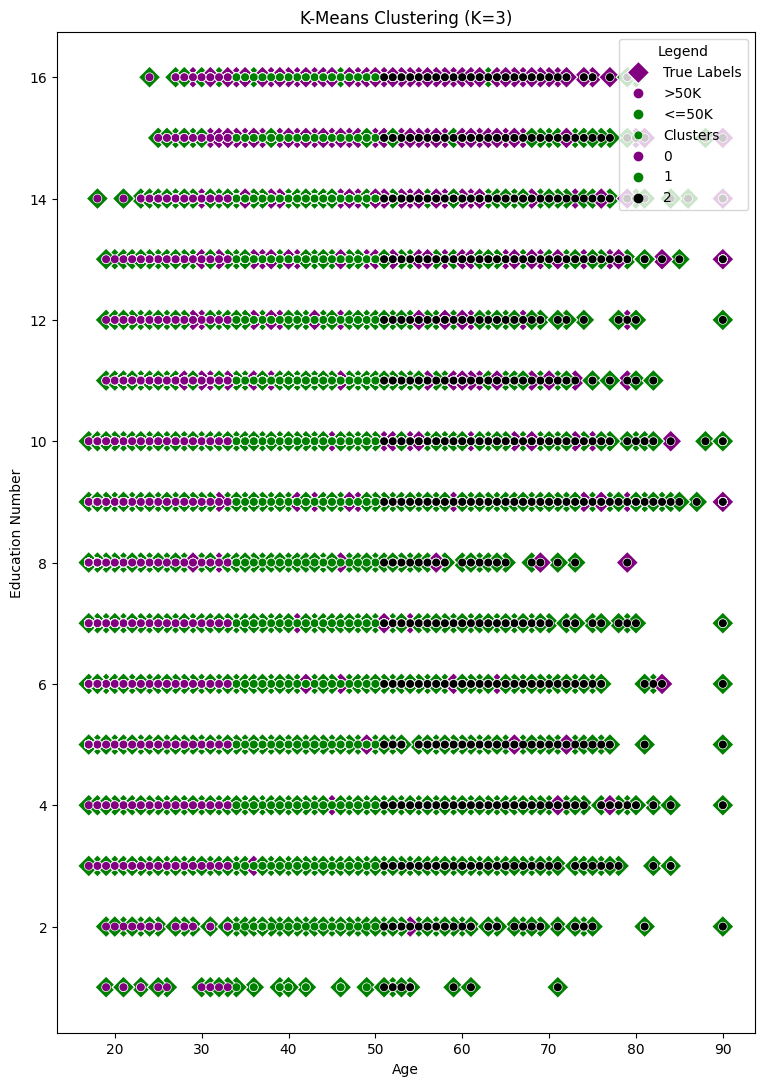

In [226]:
#Melakukan mapping Karena hasil prediksi memiliki urutan berbeda dengan label aslinya
cluster_mapping = {0: 1, 1: 0, 2: 2} # 0 jadi 1; 1 jadi 0; 2 tetap 2
#Membuat kolom baru agar tidak mengganggu kolom hasil prediksi
data["cluster2"] = data["cluster"].map(cluster_mapping)
#Membuat scatter plot untuk data point label aslinya
plt.figure(figsize=(9,13))
warna = ["purple", "green", "black"]
sns.scatterplot(data, x="age", y="education.num", palette=warna,
hue="income", marker="D", s=130, label="True Labels")

#Menindih data point tersebut dengan hasil prediksinya
sns.scatterplot(data, x="age", y="education.num", palette=warna,
hue="cluster2", marker="o", s=40, label="Clusters")

plt.title("K-Means Clustering (K=3)")
plt.xlabel("Age")
plt.ylabel("Education Number")
plt.legend(title="Legend", loc="upper right")
plt.show()